In [42]:
import pandas as pd

In [43]:
import numpy as np

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bike%20Prices.csv')

In [45]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [47]:
df = df.dropna()

In [48]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [49]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [50]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [51]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [52]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [53]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [54]:
df.shape

(626, 8)

In [55]:
df.replace({'Seller_Type': {'Individual':0, 'Dealer': 1}}, inplace=True)

In [56]:
df.replace({'Owner':{'1st owner': 0, '2nd owner': 1, '3rd owner': 2, '4th owner': 3}}, inplace=True)

In [57]:
y = df['Selling_Price']

In [58]:
y.shape

(626,)

In [59]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [60]:
x = df.drop(['Brand', 'Model' , 'Selling_Price'], axis=1)

In [61]:
x.shape

(626, 5)

In [62]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 252529)

In [65]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(x_test)

In [70]:
y_pred.shape

(188,)

In [71]:
y_pred

array([170070.91657873,  58030.98271163,  -7865.92408292,  30531.0931006 ,
        66053.75474625,    426.85871587,  49965.20410722,   1396.76908499,
        26535.93517718,  29752.00174753,  49261.32218748,  34553.16874459,
        58843.54864853,  74846.58690912,   5655.84538906,  51737.64893586,
        72720.15258209,  54876.9571769 ,  77593.28181482,  39775.48030015,
        36012.57633286, 130050.56820116,  67363.83596169,  -8747.55970454,
        37557.8738172 , 111167.29319484,  74610.3898847 ,  60026.13913387,
        49152.39637586, 252497.58562933,  63027.09107221,  60059.54862342,
       111141.57451298,  93943.0637703 ,  80302.75630276,  13397.4362173 ,
       116238.14961885,  58655.56431245,  55344.81197678,  33223.30105667,
        50022.17401088,  44339.2421816 ,  24318.96217904,  -2752.47826091,
        61841.35005405, 117482.75063378,  54411.45665079,  52687.86906064,
        52318.20718858,  36210.45433927,  28276.42890281,  32379.42486667,
        37694.79620049,  

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
mean_squared_error(y_test,y_pred)

392585117.1081363

In [74]:
mean_absolute_error(y_test,y_pred)

12200.403550727402

In [75]:
r2_score(y_test, y_pred)

0.8200269696902869

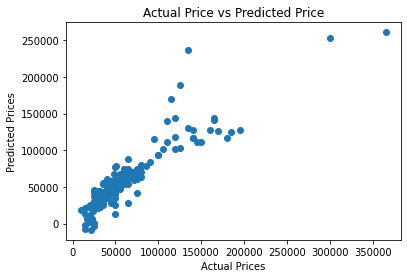

In [76]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [77]:
df_new = df.sample(1)

In [78]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
508,Bajaj,Bajaj Avenger Street 220,80000,2018,0,0,21178,95955.0


In [79]:
df_new.shape

(1, 8)

In [80]:
x_new = df_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [81]:
y_pred_new = lr.predict(x_new)

In [82]:
y_pred_new

array([80302.75630276])